<a href="https://colab.research.google.com/github/mopheiok/hands_on_sk_tf/blob/master/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 获取数据

In [0]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

MAP_PATH = os.path.join("images", CHAPTER_ID)
MAP_URL = DOWNLOAD_ROOT + "images/end_to_end_project/california.png"

def fetch_california_map(map_url=MAP_URL, map_path=MAP_PATH):
  if not os.path.isdir(map_path):
    os.makedirs(map_path)
  map_path_local = os.path.join(map_path, "california.png")
  urllib.request.urlretrieve(map_url, map_path_local)

In [0]:
fetch_housing_data()
fetch_california_map()

In [0]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## 快速查看数据结构

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [0]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [0]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


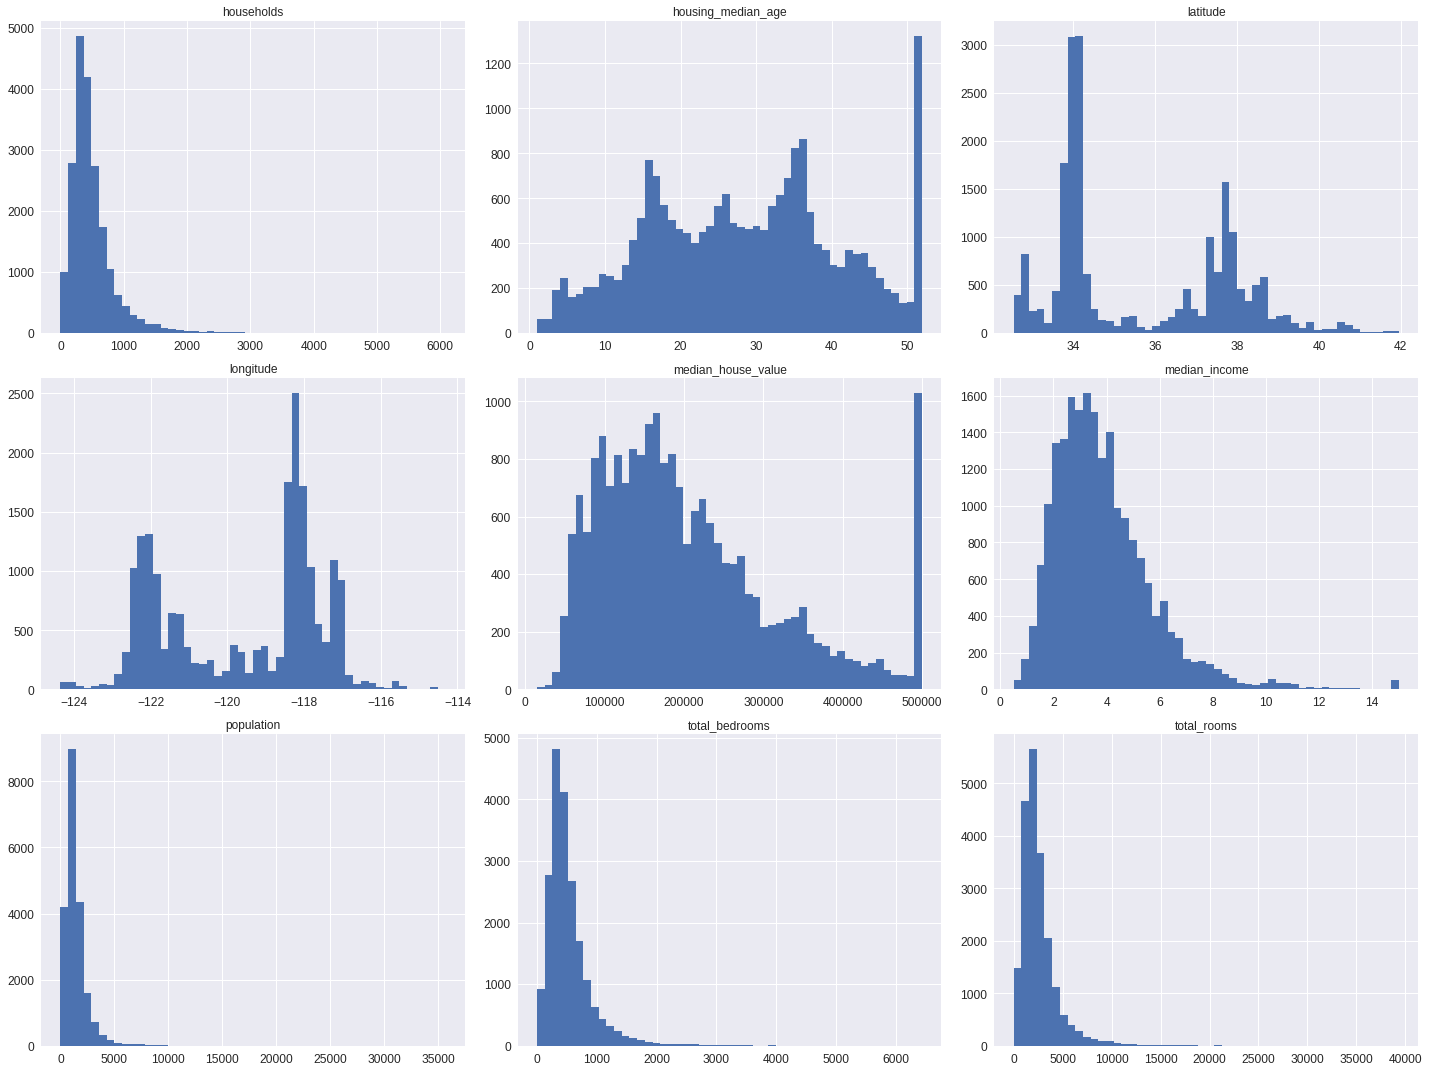

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## 创建训练集和测试集

### 自定义分割方法

In [0]:
# to make this notebook's output identical at every run
np.random.seed(42)

在分割数据集的过程中，再次执行分割过程就会产生不同的测试集。多次运行之后，算法就会得到整个数据集，这是需要避免的。

其方法有二：

 - 将第一次得到的测试集保存起来
 - 设置随机数生成器的种子， 以产生总是相同的洗牌指数

In [0]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # 对数据索引进行洗牌，即打乱数据原有顺序
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [0]:
data_test =np.arange(5)
data_test

array([0, 1, 2, 3, 4])

In [0]:
# Permutation 排列 Combination 组合
np.random.permutation(len(data_test)) # 产生随机排列

array([1, 4, 2, 0, 3])

In [0]:
train_set, test_set = split_train_test(housing, 0.2) # 对数据集进行2:8分裂
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


但是如果数据集更新（*即在原数据集基础上新增加数据*），这两个方法都会失效。一个通常的解决办法是使用每个实例的ID来判定这个实例是否应该放入测试集（假设每个实例都有唯一并且不变的ID）。

例如，你可以计算出每个实例ID的哈希值，只保留其最后一个字节，如果该值小于等于 51（约为 256 的 20%），就将其放入测试集。这样可以保证在多次运行中，测试集保持不变，即使更新了数据集。新的测试集会包含新实例中的 20%，但不会有之前位于训练集的实例（*因为根据原数据集的 ID中已经将 $< 51$ 的数据归入测试集，新更新的数据中若有小于51的，则也归入测试集，所以原数据集的分割没有变化，新加入的数据进行了再分割，将原测试集增大*）。下面是一种可用的方法：

In [0]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


[LBS知识之经纬度精度](https://www.biaodianfu.com/lbs-precision.html)
只需要精确到小数点后7位，精度就是1CM，因此，数据库保存经纬度采用 decimal(10,7) 即可

问题1：为什么不采用float?

答：float,double容易产生误差，对精确度要求比较高时，建议使用decimal来存，decimal在mysql内存是以字符串存储的

问题2：为什么不用字符串？

答：字符串不方便数据库计算

In [16]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"] #使用经纬度构造ID
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
print(len(train_set), "train +", len(test_set), "test")

16322 train + 4318 test


### 使用Scikit-Learn 提供的函数分割数据集

In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)